<a href="https://colab.research.google.com/github/cantaruttim/Rotinas/blob/main/estudos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

precisamos agora realizar a seguinte operação

$$ ui = q2 - xi$$

$$ vi = x(n + 1 - i)$$

In [1]:
import pandas as pd

df = pd.read_csv("dados.csv")
serie = df['Idade'].values
serie, len(serie)

(array([23, 23, 35, ..., 54, 42, 17]), 70025)

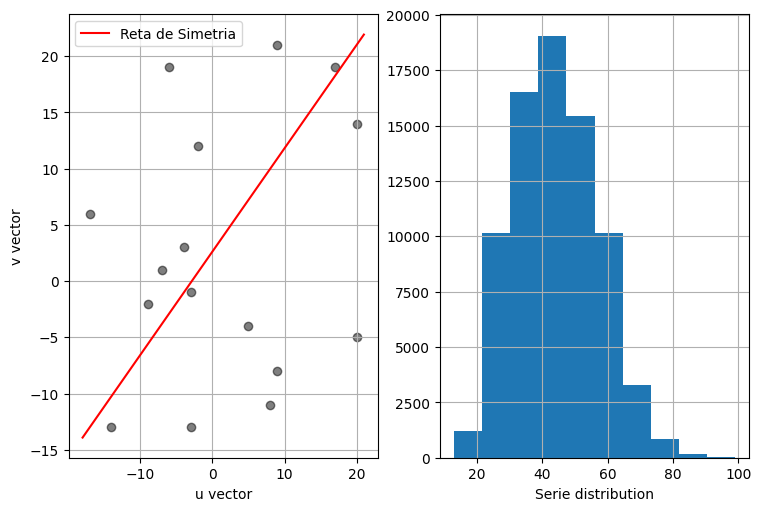

In [27]:
## função completa

import matplotlib.pyplot as plt
import statsmodels as stats
import numpy as np
import pandas as pd
import seaborn as sns
import math

df = pd.read_csv("dados.csv")
l = df['Idade'].values

def similarity(l):

  serie = l

  u = []
  v = []
  q2 = np.median(l)

  for i in range(len(l)):

    if (q2 - l[i]) == 0:
      break

    else:
      u.append(q2 - l[i])


  for j in range(len(l) + 1):

    if (l[-j] - q2) == 0:
      break

    else:
      v.append(l[-j] - q2)

  return u, v[1:], q2


u, v, q2 = similarity(l)

def letter_equation(u, v):

  m = ( (np.max(v) - np.min(v)) / (np.max(u) - np.min(u) ) )
  b = np.min(v) - m * np.min(u)
  u_values = [np.min(u) - 1, np.max(u) + 1]
  v_values = [m * x_val + b for x_val in u_values]

  return u_values, v_values

u_values, v_values = letter_equation(u, v)

def plotting_similarity(u, v):
  fig, ax = plt.subplots(1, 2, figsize=(7.5,5), layout='constrained')

  ax[0].scatter(u, v, c='black', alpha=0.5)
  ax[0].plot(u_values, v_values, c="red", label = "Reta de Simetria")
  ax[0].grid(True)
  ax[0].set_xlabel("u vector")
  ax[0].set_ylabel("v vector")
  ax[0].legend(loc="upper left")

  ## Personalizar conforme o desvio
  ax[1].hist(l)
  ax[1].set_xlabel("Serie distribution")
  ax[1].grid(True)


plotting_similarity(u, v);

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

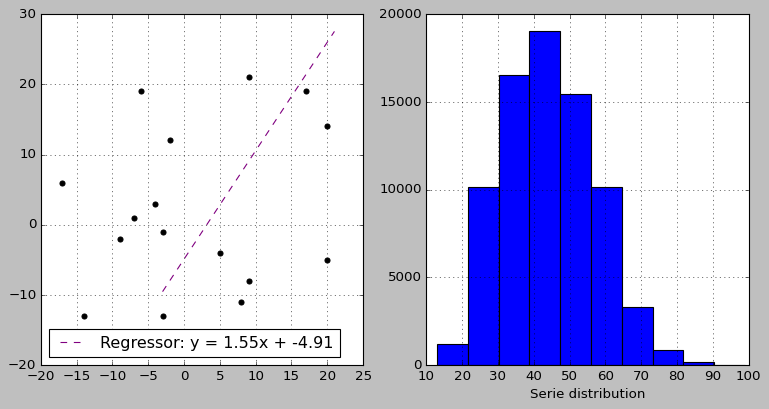

In [ ]:
def sklearn_regressionLine(u, v):


  X_train, X_test, y_train, y_test = train_test_split(u, v, test_size = 0.2, random_state=42)

  m_test = ( (max(v) - min(v))  / (max(X_test) - min(X_test)))
  b_test = np.min(y_test) - m_test * np.min(X_test)
  X_values_test = [np.min(X_test) - 1, np.max(X_test) + 1]
  y_values_test = [m_test * x_val_test + b_test for x_val_test in X_values_test]

  fig, ax = plt.subplots(1, 2, figsize=(9.5,5), layout='constrained')

  ax[0].scatter(u, v, color = 'black')

  ## Reta com o Regressor Linear
  ax[0].plot(X_values_test, y_values_test, color = 'purple', linestyle = '--',
          label = "Regressor: y = {:.2f}x + {:.2f}".format(m_test, b_test))


  ax[0].legend(loc="lower left")
  ax[0].grid(True)

  ## Personalizar conforme o desvio
  ax[1].hist(l)
  ax[1].set_xlabel("Serie distribution")
  ax[1].grid(True)

  return plt.show()

sklearn_regressionLine(u, v)

In [ ]:
def identifica_ponto(u, y):
  return math.sqrt((u - y) ** 2)

p = []

# Calcular as distâncias para cada par de elementos correspondentes em u e v
for i in range(len(u)):
    pontos = identifica_ponto(u[i], v[i])
    p.append(pontos)
print(p)

[25.0, 6.0, 19.0, 10.0, 7.0, 17.0, 1.0, 23.0, 8.0, 2.0, 2.0, 25.0, 7.0, 9.0, 14.0, 12.0]


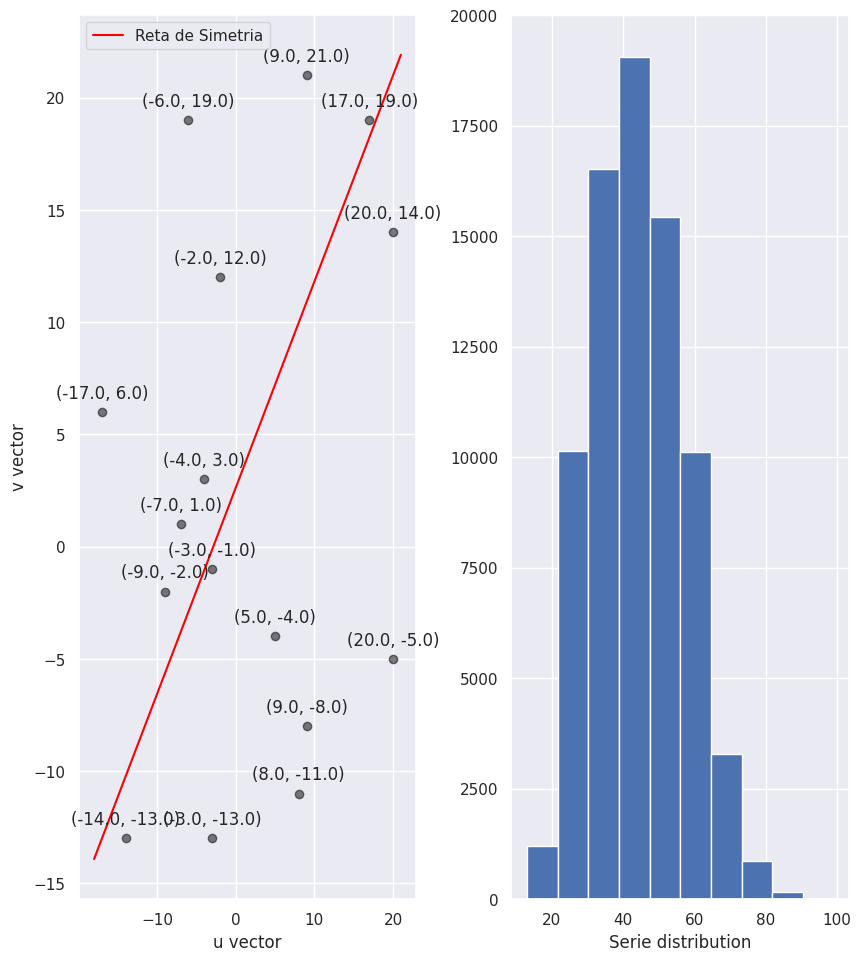

In [ ]:
def plotting_similarity(u, v):
  fig, ax = plt.subplots(1, 2, figsize=(8.5,9.5), layout='constrained')

  ax[0].scatter(u, v, c='black', alpha=0.5)
  ax[0].plot(u_values, v_values, c="red", label = "Reta de Simetria")
  ax[0].grid(True)

  # Adicionar rótulos de texto para cada ponto
  for i, txt in enumerate(v):
    ax[0].annotate(f'({u[i]}, {v[i]})', (u[i], v[i]),
                 textcoords="offset points",
                 xytext=(0, 10), ha='center')

  ax[0].set_xlabel("u vector")
  ax[0].set_ylabel("v vector")
  ax[0].legend(loc="upper left")

  ## Personalizar conforme o desvio
  ax[1].hist(l)
  ax[1].set_xlabel("Serie distribution")
  ax[1].grid(True)


plotting_similarity(u, v);

## Outra forma de calcular a regressão linear

* cálculo da correlação

$$Y = a + bx$$

In [98]:
import pandas as pd

dados = {'X': u,
         'Y': v}

df = pd.DataFrame(dados)

In [106]:
Xm = df['X'].mean()
Ym = df['Y'].mean()

df['(Xi - Xm)'] = df['X'] - Xm
df['(Yi - Ym)'] = df['Y'] - Ym
df['Xi.Yi'] = df['(Xi - Xm)'] * df['(Yi - Ym)']
df['(Xi)²'] = df['(Xi - Xm)'] ** 2
df['(Yi)²'] = df['(Yi - Ym)'] ** 2
df

,X,Y,(Xi - Xm),(Yi - Ym),Xi.Yi,(Xi)²,(Yi)²
0,20.0,-5.0,18.5625,-7.375,-136.898438,344.566406,54.390625
1,20.0,14.0,18.5625,11.625,215.789062,344.566406,135.140625
2,8.0,-11.0,6.5625,-13.375,-87.773438,43.066406,178.890625
3,-3.0,-13.0,-4.4375,-15.375,68.226562,19.691406,236.390625
4,-4.0,3.0,-5.4375,0.625,-3.398438,29.566406,0.390625
5,9.0,-8.0,7.5625,-10.375,-78.460938,57.191406,107.640625
6,-14.0,-13.0,-15.4375,-15.375,237.351562,238.316406,236.390625
7,-17.0,6.0,-18.4375,3.625,-66.835938,339.941406,13.140625
8,-7.0,1.0,-8.4375,-1.375,11.601562,71.191406,1.890625
9,17.0,19.0,15.5625,16.625,258.726562,242.191406,276.390625


In [182]:
table.iloc[0:1]

,X,Y,X * Y,X²
0,23.0,38.0,440.375,1995.9375


In [184]:
b = ( (len(df) * df['Xi.Yi'].sum()) - (df['X'].sum() * df['Y'].sum())  ) /  ( (len(df) * df['(Xi)²'].sum()) - df['X'].sum())
b

0.19340686888944597

In [185]:
a = np.mean(df['Y']) + b * np.mean(df['X'])

In [186]:
a

2.6530223740285788

In [188]:
expr = f"Y = {round(a, 3)} + {round(b, 3)}x"
expr

'Y = 2.653 + 0.193x'

## Outra forma

### (I) $$∑{(y)} = n(a) + (b)∑(x)$$



---

[Doc sympy](https://docs.sympy.org/latest/tutorials/intro-tutorial/basic_operations.html#converting-strings-to-sympy-expressions)

In [161]:
import sympy

In [162]:
table.iloc[0,1]

38.0

In [171]:
one_str_expr = f"{table.iloc[0, 1]} = {n}a + {table.iloc[0,0]}b"
one_str_expr

'38.0 = 16a + 23.0b'

In [170]:
## fator p/ multiplicação

d = (table.iloc[0,0] / n)
d

1.4375

### (II) $$∑{(x.y)} = (a).∑(x) + (b).∑(x²)$$



---



In [172]:
two_str_expr = f"{table.iloc[0, 2]} = {table.iloc[0, 0]}a + {table.iloc[0,3]}b"
two_str_expr

'440.375 = 23.0a + 1995.9375b'

In [174]:
q = table.iloc[0, 1] * d
w = table.iloc[0, 0] * d
e = table.iloc[0,3] * d

print(q,w,e)

54.625 33.0625 2869.16015625


In [181]:
new_expr = f'{table.iloc[0, 2] - q} = {table.iloc[0, 0] - w}a {table.iloc[0,3] - e}b'
new_expr

'385.75 = -10.0625a -873.22265625b'

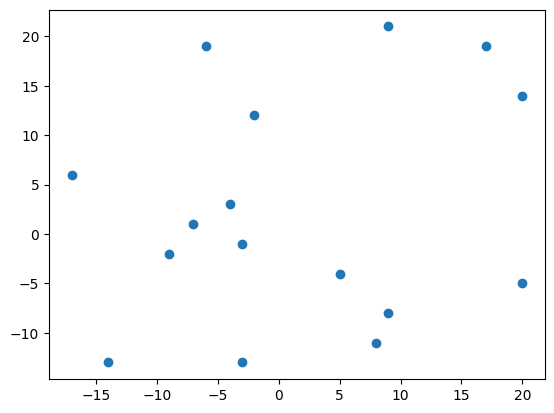

In [117]:
plt.scatter(df['X'].values, df['Y'].values)